# **Movie Review Sentiment Classification using Bigram Language Model**

In [ ]:
import re
from collections import Counter
import matplotlib.pyplot as plt
import string

In [ ]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag
from nltk.util import bigrams

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# **Reading Movie Reviews from a Text File**

In [ ]:
# Open the file "Movie_Reviews.txt" in read mode with UTF-8 encoding
# Read all lines from the file and store them in the list variable "movie_reviews"
with open("Movie_Reviews.txt", "r", encoding="utf-8") as file:
    movie_reviews = file.readlines()

In [ ]:
# Remove "=" marks
cleaned_reviews = [review.replace("=", "") for review in movie_reviews]

# Print the cleaned reviews
for review in cleaned_reviews:
    print(review)

Positive Reviews





1. "Forrest Gump is an absolute masterpiece! Tom Hanks delivers an unforgettable performance, and the storytelling is heartwarming. This movie is a journey through life that will make you laugh, cry, and appreciate the simple beauties of existence."



2. "The Shawshank Redemption is a timeless classic. The powerful themes of hope, friendship, and redemption make it a must-watch. Morgan Freeman and Tim Robbins give exceptional performances in this brilliantly crafted film."



3. "The epic conclusion to The Lord of the Rings trilogy, The Return of the King, is a cinematic triumph. The breathtaking visuals, epic battles, and emotionally resonant story make it a monumental achievement in filmmaking."



4. "La La Land is a love letter to the magic of Hollywood and dreams. The chemistry between Ryan Gosling and Emma Stone is enchanting, and the music and dance sequences are a pure delight. A modern musical masterpiece."



5. "Wes Anderson's whimsical style shines in

# **Categorizing Movie Reviews into Positive and Negative Categories**

In [ ]:
# Initialize empty lists to store positive and negative reviews
positive_reviews = []
negative_reviews = []

# Flag to determine if a review is positive or negative
is_positive = False

# Sentence to exclude
exclude_sentence = "It's clear that the movie has both its enthusiasts and critics."

# Iterate through cleaned reviews and categorize them as positive or negative reviews
# Append the review to the appropriate list
for review in cleaned_reviews:
    if "Positive Reviews" in review:
        is_positive = True
    elif "Negative Reviews" in review:
        is_positive = False
    elif review.strip() and exclude_sentence not in review:
        if is_positive:
            positive_reviews.append(review)
        else:
            negative_reviews.append(review)

# Print all positive  reviews
print("Positive Reviews:")
for positive_review in positive_reviews:
    print(positive_review)

# Print all negative reviews
print("\nNegative Reviews:")
for negative_review in negative_reviews:
    print(negative_review)

Positive Reviews:
1. "Forrest Gump is an absolute masterpiece! Tom Hanks delivers an unforgettable performance, and the storytelling is heartwarming. This movie is a journey through life that will make you laugh, cry, and appreciate the simple beauties of existence."

2. "The Shawshank Redemption is a timeless classic. The powerful themes of hope, friendship, and redemption make it a must-watch. Morgan Freeman and Tim Robbins give exceptional performances in this brilliantly crafted film."

3. "The epic conclusion to The Lord of the Rings trilogy, The Return of the King, is a cinematic triumph. The breathtaking visuals, epic battles, and emotionally resonant story make it a monumental achievement in filmmaking."

4. "La La Land is a love letter to the magic of Hollywood and dreams. The chemistry between Ryan Gosling and Emma Stone is enchanting, and the music and dance sequences are a pure delight. A modern musical masterpiece."

5. "Wes Anderson's whimsical style shines in The Grand B

In [ ]:
print('Number of positive reviews: ', len(positive_reviews))
print('Number of negative reviews: ', len(negative_reviews))

Number of positive reviews:  12
Number of negative reviews:  12


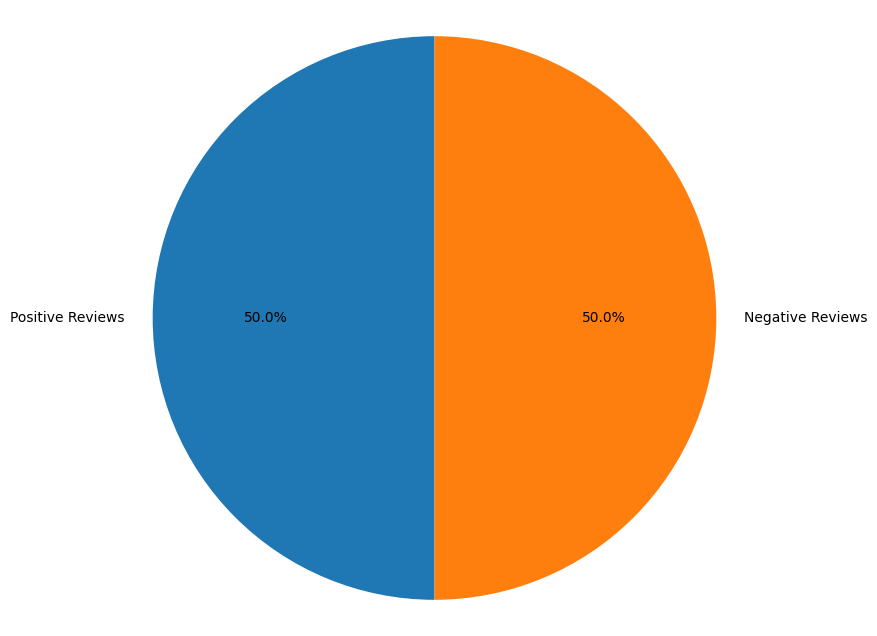

In [ ]:
sentiment_counts = [len(positive_reviews), len(negative_reviews)]
sentiments = ['Positive Reviews', 'Negative Reviews']

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(sentiment_counts, labels=sentiments, autopct='%1.1f%%', startangle=90)

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')

# Display the chart
plt.show()


# **Preprocessing**

# **Convert to Lowercase**

In [ ]:
# Convert positive and negative reviews to lowercase
positive_reviews_lower = [review.lower() for review in positive_reviews]
negative_reviews_lower = [review.lower() for review in negative_reviews]

# Display the lowercase reviews
print("Positive Reviews (Lowercase):", positive_reviews_lower)
print("Negative Reviews (Lowercase):", negative_reviews_lower)

# **Remove Punctuation**

In [ ]:
# Function to remove punctuation
def remove_punctuation(text):
    return re.sub(r'[^\w\s]', '', text)

# Remove punctuation from positive and negative reviews
positive_reviews_without_punct = [remove_punctuation(review) for review in positive_reviews_lower]
negative_reviews_without_punct = [remove_punctuation(review) for review in negative_reviews_lower]

# Display the reviews without punctuation
print("Positive Reviews (No Punctuation):", positive_reviews_without_punct)
print("Negative Reviews (No Punctuation):", negative_reviews_without_punct)

# **Tokanizing**

This code performs the tokenization of both positive and negative reviews. First, it tokenizes each review into individual words using the word_tokenize function. Then, it flattens the lists of tokenized words for positive and negative reviews into single lists. Finally, it prints the tokenized words for both positive and negative reviews. The result is a list of individual words extracted from the reviews.

In [ ]:
# Tokenize positive and negative reviews into words
positive_reviews_tokenized = [word_tokenize(review) for review in positive_reviews_without_punct]
negative_reviews_tokenized = [word_tokenize(review) for review in negative_reviews_without_punct]


# Flatten the lists of tokenized words
positive_reviews_flat = [word for review in positive_reviews_tokenized for word in review]
negative_reviews_flat = [word for review in negative_reviews_tokenized for word in review]


# Display the tokenized reviews
print("Positive Reviews (Tokenized):", positive_reviews_flat)
print("Negative Reviews (Tokenized):", negative_reviews_flat)

# **Remove Stop words and Lemmatization**

In this code it begins by performing part-of-speech tagging to categorize words into their grammatical roles. Stop words are removed, and any numbers are filtered out. The remaining words are lemmatized based on their part-of-speech tags, reducing them to their base forms. The result is a list of preprocessed words for both positive and negative reviews.

In [ ]:
def get_wordnet_pos(tag):
    # Map POS tag to WordNet POS tag
    tag_dict = {"N": "n", "V": "v", "R": "r", "J": "a"}
    return tag_dict.get(tag[0], 'n')  # Default to noun if not found

def lemmatize_reviews(reviews):
    # Perform part-of-speech tagging
    reviews_pos = pos_tag(reviews)

    # Define stop words and remove them, also remove numbers
    stop_words = set(stopwords.words("english"))

    reviews_filtered = [word for word, pos in reviews_pos if word not in stop_words and word.isalpha()]

    # Lemmatize the filtered words based on POS
    lemmatizer = WordNetLemmatizer()
    reviews_lemmatized = [lemmatizer.lemmatize(word, pos=get_wordnet_pos(pos)) for word, pos in pos_tag(reviews_filtered)]

    return reviews_lemmatized

# Preprocess positive and negative reviews
cleaned_positive_reviews = lemmatize_reviews(positive_reviews_flat)
cleaned_negative_reviews = lemmatize_reviews(negative_reviews_flat)

# Display the preprocessed reviews
print("Positive Reviews (Preprocessed):", cleaned_positive_reviews)
print("Negative Reviews (Preprocessed):", cleaned_negative_reviews)

# **Implement Bigram Model**

Since this is a small dataset, I chose the Bigram model. Using higher N-values, such as trigrams or more would require more extensive training data to provide accurate and reliable predictions. With a bigram model, I focus on pairs of consecutive words, making it more suitable for smaller datasets where higher order N-grams may result in unreliable statistics.

Unigrams consider each word in isolation and do not capture the contextual information provided by bigrams or higher order N-grams. In sentiment analysis and language modeling, context plays a crucial role in understanding the meaning and sentiment of text. Therefore, unigrams may not adequately capture the associations between words that are vital for sentiment analysis.


In [ ]:
# Generate bigrams for positive and negative reviews
positive_bigrams = list(bigrams(cleaned_positive_reviews))
negative_bigrams = list(bigrams(cleaned_negative_reviews))

print(positive_bigrams)
print(negative_bigrams)

In [ ]:
# Calculate Bigram probabilities for each Bigram in the corpus

def calculate_bigram_probabilities(bigrams,unigrams):
    bigram_probabilities = {}
    for bigram in bigrams:
        word1, word2 = bigram
        bigram_count = bigrams.count(bigram)
        unigram_count = unigrams.count(word1)
        bigram_probabilities[bigram] = (bigram_count) / (unigram_count)

    return bigram_probabilities

positive_bigram_probabilities = calculate_bigram_probabilities(positive_bigrams, cleaned_positive_reviews)
negative_bigram_probabilities = calculate_bigram_probabilities(negative_bigrams, cleaned_negative_reviews)

print(positive_bigram_probabilities)
print(negative_bigram_probabilities)

# **Implement the function to predict the catogory of a movie review**

In [ ]:
def classify_movie_review(test_review):

    # Remove punctuation and stop words, tokenize, and lemmatize the words in the test_review
    test_review_no_punct = ''.join([char for char in test_review if char not in string.punctuation])
    test_words = word_tokenize(test_review_no_punct)
    test_words = lemmatize_reviews(test_words)

    # Generate bigrams for the test review
    test_bigrams = list(bigrams(test_words))

    # Calculate the N-gram probability for the test review
    positive_probability = 1.0
    negative_probability = 1.0

    # Calculate probabilities for positive bigrams
    for bigram in test_bigrams:
        if bigram in positive_bigram_probabilities:
            positive_probability *= positive_bigram_probabilities[bigram]

    # Calculate probabilities for negative bigrams
    for bigram in test_bigrams:
        if bigram in negative_bigram_probabilities:
            negative_probability *= negative_bigram_probabilities[bigram]

    # Predict the category of the test movie review
    if positive_probability > negative_probability:
       prediction_explanation = "The review is classified as positive."
    elif positive_probability < negative_probability:
       prediction_explanation = "The review is classified as negative."
    else:
       prediction_explanation = "The review is classified as neutral."

    print(f"Positive Probability: {positive_probability}")
    print(f"Negative Probability: {negative_probability}")

    return prediction_explanation


In [ ]:
def classify_movie_review(test_review):

    # Remove punctuation and stop words, tokenize and lemmatize the words in the test_review
    test_review_no_punct = ''.join([char for char in test_review if char not in string.punctuation])
    test_words = word_tokenize(test_review_no_punct)
    test_words = lemmatize_reviews(test_words)

    # Generate bigrams for the test review
    test_bigrams = list(bigrams(test_words))

    # Calculate the bigram probability for the test review
    positive_prob = 1.0
    negative_prob = 1.0

    for bigram in test_bigrams:
        positive_prob *= positive_bigram_probabilities.get((bigram), 1e-10)  # Using 1e-10 as a small value to avoid division by zero
        negative_prob *= negative_bigram_probabilities.get((bigram), 1e-10)

    print()

    # Predict the category of the test movie review
    if positive_prob > negative_prob:
       prediction_explanation = "The review is classified as positive."
    elif positive_prob < negative_prob:
       prediction_explanation = "The review is classified as negative."
    else:
       prediction_explanation = "The review is classified as neutral."

    print(f"Positive Probability: {positive_prob}")
    print(f"Negative Probability: {negative_prob}")

    return prediction_explanation

# **Predict the catogory of a movie review**

In [ ]:
# Call the function and print the output
test_review = "It's clear that the movie has both its enthusiasts and critics. While it may not be to everyone's taste, it's worth watching with an open mind to form your own opinion."

output = classify_movie_review(test_review)
print(output)

Positive Probability: 7.694675284702985e-05
Negative Probability: 0.00010628122010840684
The review is classified as negative.
